<a href="https://colab.research.google.com/github/tmoura/machinelearning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [ ]:
print(diabetes['DESCR'])

In [ ]:
import pandas as pd

X = pd.DataFrame(diabetes['data'] )
y = pd.DataFrame(diabetes['target'] )

X.head()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


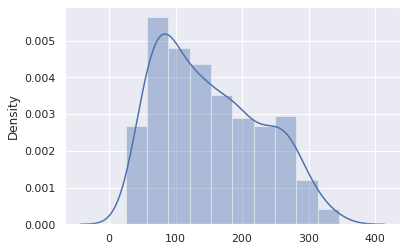

In [50]:
import seaborn as sns

sns.distplot(diabetes['target']);

In [14]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353, 1) (89, 1)


In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [60]:
print('labels\n',X.columns)
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print('R2 for Train)', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

labels
 RangeIndex(start=0, stop=10, step=1)
Coefficients: 
 [[ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
   324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]]
Intercept: 
 [152.53813352]
R2 for Train) 0.5539285357415583
R2 for Test (cross validation) 0.33222203269065176


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lm, X_train, y_train, cv=10) 

print("R2:", scores, "\n R2_avg: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn import metrics

result = lm.predict(X_test)

acc = metrics.mean_squared_error(result, y_test)

print(acc)

df = y_test.copy()

df['PRED'] = result
df = df.rename(columns={0: 'TRUE'})

print(df)

In [ ]:
import seaborn as sns; sns.set(color_codes=True)

ax = sns.regplot(x='TRUE', y="PRED", data=df[['TRUE','PRED']])